# TEACHER KEY
***Feel free to use CTRL + F and search "TEACHER" to easily jump to each answer.***

# **BEACO2N Notebook 3b: Wildfire Combustion**

Notebook developed by: *Arushi Sharma, Anna Winter, Skye Pickett, Alec Morgan, Lan Dinh, Su Min Park, Amy Castillo*



### Learning Outcomes
Working through this notebook, you will learn about:
1. How CO2, NO, and PM2.5 concentrations change throughout a wildfire period
1. DataFrame manipulation
1. Time Series Analysis


## Table of Contents
1. Wildfires in August 2021
>1.1 Loading in Packages
1. A Guide to Time Series
1. Pollutant Exploration
>3.1 Select and Load Your Pollutant Data
<br>3.2 Data Visualization
1. Conclusion


*Note: In this notebook, there are some more advanced topics that are "optional". This means you can just read over these sections; don't worry about fully understanding these parts unless you are really interested. They may be useful later in the course, but for now they are not necessary, so feel free to just skim the parts labelled "Optional"!*


<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

##1. Wildfires in August 2021
Now that we've learned about the Orange Sky wildfire event of September 9th, 2020, let's look at other wildfire events. California experienced *numerous* wildfires in August of 2021.

**Q1: Do a Google search to see what fires may have been affecting the air quality *of the Bay Area* in August 2021. Write your answer in a few sentences the text cell below.**



**STUDENT ANSWER HERE**<br>
@ TEACHER: Answers will vary a bit, but students should list at least 1 fire name from August 2021. These are some notable ones in California around that time that they may have found in their research: <br>
* Dixie Fire: The largest wildfire in California history, burning nearly 1 million acres.
* McFarland Fire: Burned over 42,000 acres in Shasta and Tehama counties.
* Caldor Fire: Destroyed hundreds of structures and prompted widespread evacuations near Lake Tahoe.
* River Complex Fire: A group of several fires encompassing over 29,000 acres in Mendocino County.

Similarly to the Wildfire Combustion In Class Notebook, you will now get a chance to explore how wildfires affected several different pollutants in **August 2021**. Feel free to have that notebook open to help with this one!


### 1.1 Loading in Packages

Python requires us to load packages. We'll be using the same packages we loaded in the In Class Notebook we went through together, however since this is a separate notebook than the In Class Notebook, we need to load them in again. **Run the cell below.**

In [ ]:
## RUN THIS CELL

# Packages used for visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical computation
import numpy as np
from numpy import NaN
from decimal import Decimal

# Manuplating data in form of series or dataframes
import pandas as pd

# Manipulating fields that are date or time
import datetime
from datetime import time

Since we're going to be creating visualizations in this notebook as well, it can be easiest to set some parameters in advance. Consider this like setting the stage for a show, so everything will be shown in the same view. **Run the cell below.** If any warning pops up, press "run anyway".

If you get any error saying "matplotlib is not defined", that means you haven't run the cell above this. Run that one *first* then the one below next.

In [ ]:
# Using this cell, we will be defining some matplotlib parameters for the plots that we will be creating.
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.figsize'] = [20, 14]
plt.rcParams["axes.labelweight"] = "bold"
np.set_printoptions(suppress=True)
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["savefig.facecolor"]= '#FFFFFF'

***
##2. A Guide to Time Series

**Time Series Analysis** is a method used to examine data points collected sequentially *over time*. These data points, plotted on a graph with time on the horizontal (x-axis) and the variable of interest on the vertical (y-axis), show how a particular variable evolves over time.<br>Time series analysis can help *predict future values* using patterns from the past. It's especially useful for understanding trends, cycles, or any recurring patterns in data over a time period.
<br><br>

In the In Class notebook, we plotted 4 time series and compared them.<br>In this notebook, we will take a closer look at different pollutants and how they change over time. *Before* actually plotting our time series, we will manipulate our DataFrame and learn how to do the following:  

1.   How to pull data into our notebook (read csv files)
2.   How to make regular string values to DateTime values
3.   How to re-index a DataFrame
4.   How to drop columns we don't need
5.   How to rename our columns


You can use your Wildfires In Class notebook for reference, but for convenience, we've included the code that set up the `data_2020` DataFrame below. <br>**Take a close look at each of the 5 steps done in the code cell below.**

In [ ]:
# We'll start by pulling in the 2020 data.
filename_2020 = "http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=co_corrected,pm_pct_fs_corrected&start=2020-09-01%2012:00:00&end=2020-10-01%2012:00:00&chart_type=measurement"

# Step 1) The function pd.read_csv helps us read the data into DataFrames.
data_2020  = pd.read_csv(filename_2020, on_bad_lines='skip')

# Step 2) The function pd.to_datetime helps us format the string date values into DateTime object!
# DateTime is a separate modules (like numpy) that supplies classes for manipulating dates and times.
# We want to put our second parameter as -> format='%Y-%m-%d  %H:%M:%S' because of how 'local_timestamp' is formatted.
data_2020['timestamp']=pd.to_datetime(data_2020['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')

# Step 3) '.index' stores a Series of labels that identify each row.
# By assigning DataFrame.index to a different Series (column), we are ultimately re-indexing.
data_2020.index=data_2020['timestamp']

# Step 4) Using '.drop' we put in a list of column names we no longer need. 'axis = 1' indicates we want to drop columns not rows
data_2020 = data_2020.drop(['local_timestamp','epoch','datetime','node_id','node_file_id','timestamp'],axis = 1)

# Step 5) '.rename' helps us rename the columns. Using dictionary ({a:b, c:d}), we are renaming our columns
data_2020 = data_2020.rename(columns={'co_corrected': 'co', 'pm_pct_fs_corrected': 'pm'})
data_2020[:10]

,co,pm
timestamp,,
2020-09-01 12:00:00,0.174232,22.079435
2020-09-01 13:00:00,0.131058,15.444229
2020-09-01 14:00:00,0.095515,17.599275
2020-09-01 15:00:00,0.032764,10.063400
2020-09-01 16:00:00,0.017360,9.291733
2020-09-01 17:00:00,0.019598,10.939533
2020-09-01 18:00:00,0.037986,12.340852
2020-09-01 19:00:00,0.047209,9.492878
2020-09-01 20:00:00,0.055917,9.826910


Now that you've looked at these 5 steps in the example above, let's try to practice this on our own.

***
## 3. Pollutant Exploration

Each group will explore a different pollutant. We will be looking at **PM, CO2, and NO**.
1. With your group, **pick which pollutant** you'd like to investigate.
2. Locate the appropriate section under 3.1 (ie, if you're investigating PM, read the "PM Data:" section). Take a few minutes to load the DataFrame. Work together to ensure you've filled in every line of code following the 5 steps avove.<br> *You will only need to load the data for the pollutant your group is working with. Skip the other 2 pollutants in section 3.1.*


### 3.1 Select and Load Your Pollutant Data

**@ TEACHER:** Students will pick 1 pollutant and will only fill out 1 code cell, corresponding to their chosen pollutant. The full answers are included below for all 3 pollutants. **Compare the DataFrame that is outputted in this answer key for their chosen pollutant vs in the student's notebook to assess if they've completed this portion successfully.**

#### PM Data:
You will need to fill in the **`filename_pm`** variable with this link:
>"http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=pm2_5&start=2021-08-01%2012:00:00&end=2021-08-31%2023:00:00&chart_type=measurement"

Make sure to include the quotation marks.

**You can reference the example above in Section 2: A Guide to Time Series to help you fill in the code.**

In [ ]:
filename_pm = "http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=pm2_5&start=2021-08-01%2012:00:00&end=2021-08-31%2023:00:00&chart_type=measurement"
## replace this comment with the filename
data_pm = pd.read_csv(filename_pm, on_bad_lines='skip')
## replace this comment to pull in the DataFrame into the notebook

data_pm['timestamp']= pd.to_datetime(data_pm['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')
## replace this comment with conversion to datetime object

data_pm.index= data_pm['timestamp']
## replace this comment to the column we want to re-index to

# Assume that we want to drop the same columns as the demonstrations.
data_pm = data_pm.drop(['local_timestamp','epoch','datetime','node_id','node_file_id','timestamp'],axis = 1)

## replace this comment to get rid of unnecessary columns

# Renaming the columns of the dataframe
data_pm = data_pm.rename(columns={'pm2_5': 'pm'})
## replace this comment to rename 'pm2_5' to 'pm'
data_pm[:10]

,pm
timestamp,
2021-08-01 12:00:00,1.89882
2021-08-01 13:00:00,1.57583
2021-08-01 14:00:00,2.00943
2021-08-01 15:00:00,1.52706
2021-08-01 16:00:00,1.22749
2021-08-01 17:00:00,0.95519
2021-08-01 18:00:00,0.85986
2021-08-01 19:00:00,0.80851
2021-08-01 20:00:00,0.93381


#### CO2 Data:
You will need to fill in the **`filename_co2`** variable with this link:
>"http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=co2_corrected_avg_t_drift_applied&start=2021-08-01%2012:00:00&end=2021-08-31%2023:00:00&chart_type=measurement"

Make sure to include the quotation marks.

**You can reference the example above in Section 2: A Guide to Time Series to help you fill in the code.**

In [ ]:
# This function pulls in the data from the BEACO2N website into a dataframe so we can work with it.
filename_co2 = "http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=co2_corrected_avg_t_drift_applied&start=2021-08-01%2012:00:00&end=2021-08-31%2023:00:00&chart_type=measurement"
## replace this comment with the filename
data_co2  = pd.read_csv(filename_co2, on_bad_lines='skip')
## replace this comment to pull DataFrame

data_co2['timestamp']= pd.to_datetime(data_co2['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')
## replace this comment with conversion to datetime object

data_co2.index= data_co2['timestamp']
## replace this comment to the column we want to re-index to

# Assume that we want to drop the same columns as the demonstrations.
data_co2 = data_co2.drop(['local_timestamp','epoch','datetime','node_id','node_file_id','timestamp'],axis = 1)
## replace this comment to get rid of unnecessary columns

# Renaming the columns of the dataframe
data_co2 = data_co2.rename(columns={'co2_corrected_avg_t_drift_applied': 'co2'})
## replace this comment to rename 'co2_corrected_avg_t_drift_applied' to 'co2'
data_co2[:10]

,co2
timestamp,
2021-08-01 12:00:00,407.869369
2021-08-01 13:00:00,407.901241
2021-08-01 14:00:00,408.001317
2021-08-01 15:00:00,407.734750
2021-08-01 16:00:00,408.327487
2021-08-01 17:00:00,408.561492
2021-08-01 18:00:00,409.328602
2021-08-01 19:00:00,410.649478
2021-08-01 20:00:00,410.977246


#### NO Data:
You will need to fill in the **`filename_no`** variable with this link:
>"http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=no_corrected_new_no_negatives&start=2021-08-01%2012:00:00&end=2021-08-31%2023:00:00&chart_type=measurement"

Make sure to include the quotation marks.

**You can reference the example above in Section 2: A Guide to Time Series to help you fill in the code.**

In [ ]:
# This function pulls in the data from the BEACO2N website into a dataframe so we can work with it.
filename_no = "http://128.32.208.8/node/31/measurements_all/csv?name=Fred%20T.%20Korematsu%20Elementary%20School&interval=60&variables=no_corrected_new_no_negatives&start=2021-08-01%2012:00:00&end=2021-08-31%2023:00:00&chart_type=measurement"
## replace this comment with the filename
data_no  = pd.read_csv(filename_no, on_bad_lines='skip')
## replace this comment to pull DataFrame

data_no['timestamp']= pd.to_datetime(data_no['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')
## replace this comment with conversion to datetime object

data_no.index= data_no['timestamp']
## replace this comment to the column we want to re-index to

# Assume that we want to drop the same columns as the demonstrations.
data_no = data_no.drop(['local_timestamp','epoch','datetime','node_id','node_file_id','timestamp'],axis = 1)
## replace this comment to get rid of unnecessary columns

# Renaming the columns of the dataframe
data_no =  data_no.rename(columns={'no_corrected_new_no_negatives': 'no'})
## replace this comment to rename 'no_corrected_new_no_negatives' to 'no'
data_no[:10]

,no
timestamp,
2021-08-01 12:00:00,2.866536
2021-08-01 13:00:00,2.438883
2021-08-01 14:00:00,1.779716
2021-08-01 15:00:00,1.536590
2021-08-01 16:00:00,1.358038
2021-08-01 17:00:00,1.277841
2021-08-01 18:00:00,1.209827
2021-08-01 19:00:00,1.050961
2021-08-01 20:00:00,0.435321


### 3.2 Data Visualization

Great job working with your data and turning it into a very helpful DataFrame! Now, it's your turn to explore the data!

**Q2: Create a time series plot for your pollutant (*pollutant concentration vs. time*)**. You can follow along with the example from the In Class notebook we walked through together.
>Follow this syntax: **`plt.plot(<dataframe_name>.index, <dataframe_name>["<column_name>"], color = "<color_name>")`**

It is good practice to **include units** in your axis labels. The units for the different species are listed below:

>PM: micrograms per meter cubed

>NO: parts per billion (ppb)

>CO2: parts per million (ppm)



**@ TEACHER:** The 3 pollutants have answers (different code required and resulting plots). Compare student's answer with the plot of their chosen pollutant below. Their plot should look identical to the one shown here if their code is correct. Be sure they included x-axis label, y-axis label, and a title!

Text(0.5, 1.0, 'PM Time Series')

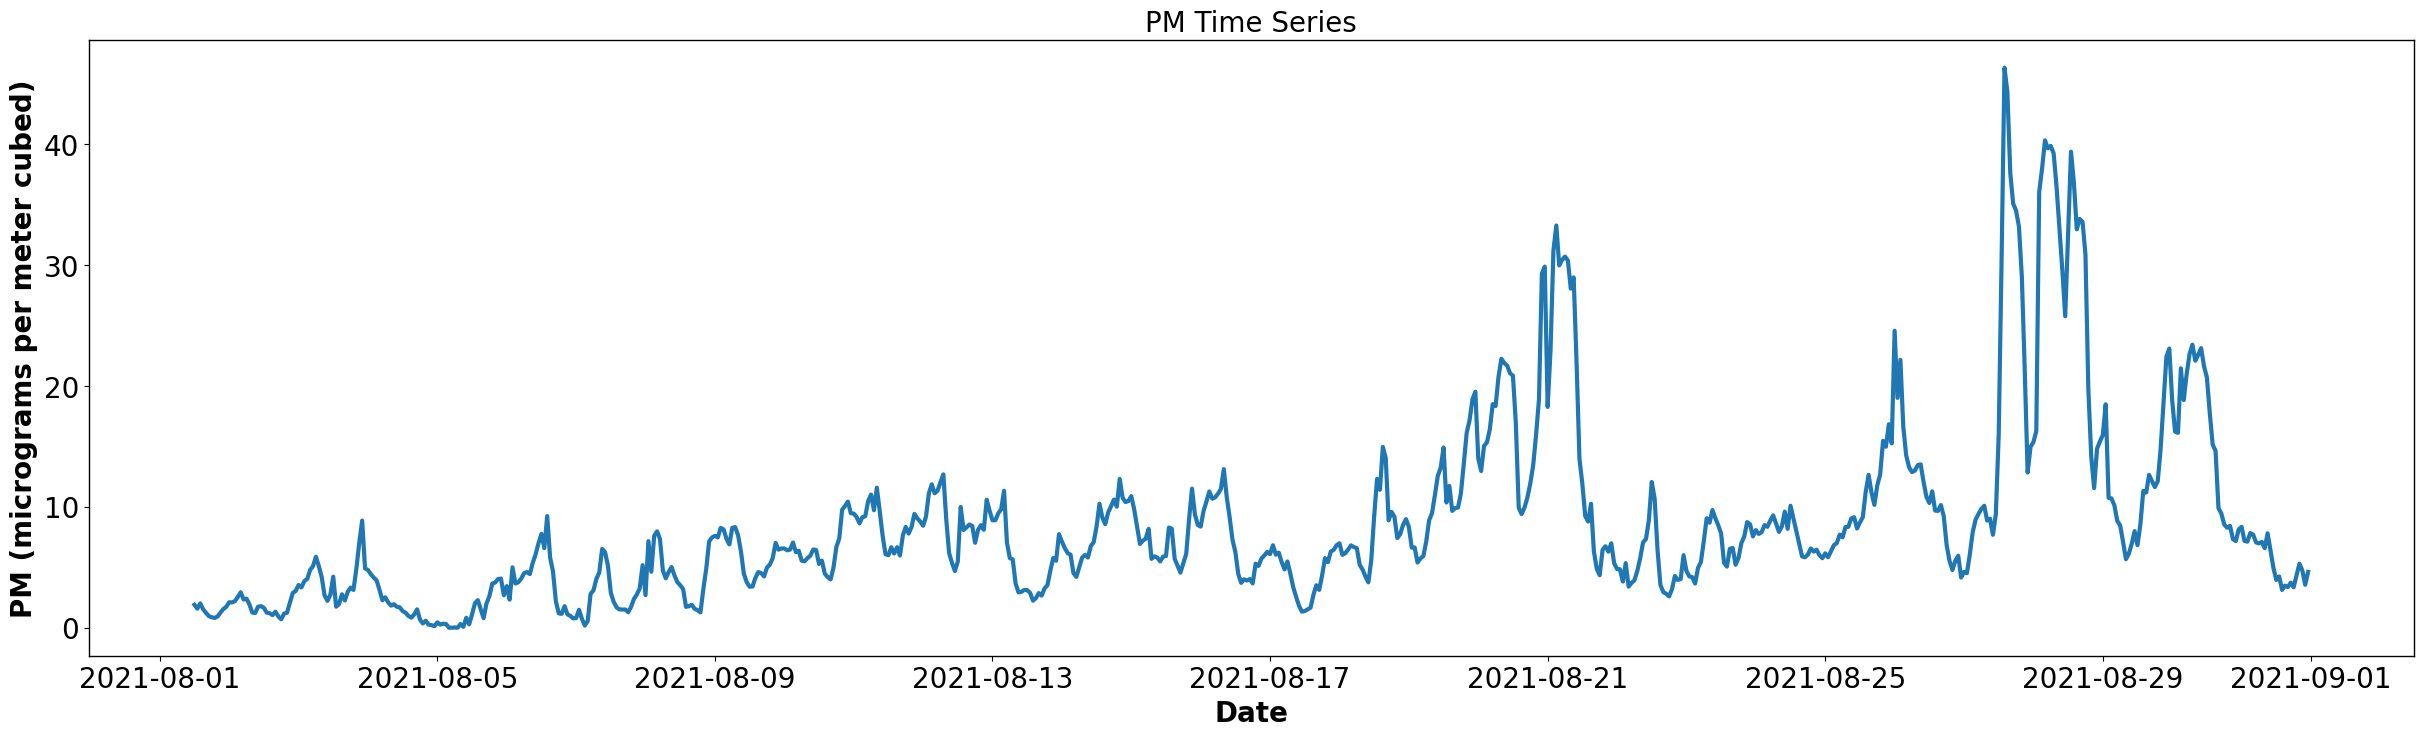

In [ ]:
## FOR PM POLLUTANT

plt.figure(figsize = (30, 8)) # given

plt.plot(data_pm.index, data_pm['pm'])


# Adds a x-axis label: "Date"
plt.xlabel("Date")

# Adds a y-axis label: (Your pollutant and the units)
plt.ylabel("PM (micrograms per meter cubed)")

# Adds a title to our line plot: "<Your Pollutant> Time Series"
plt.title("PM Time Series")


Text(0.5, 1.0, 'NO Time Series')

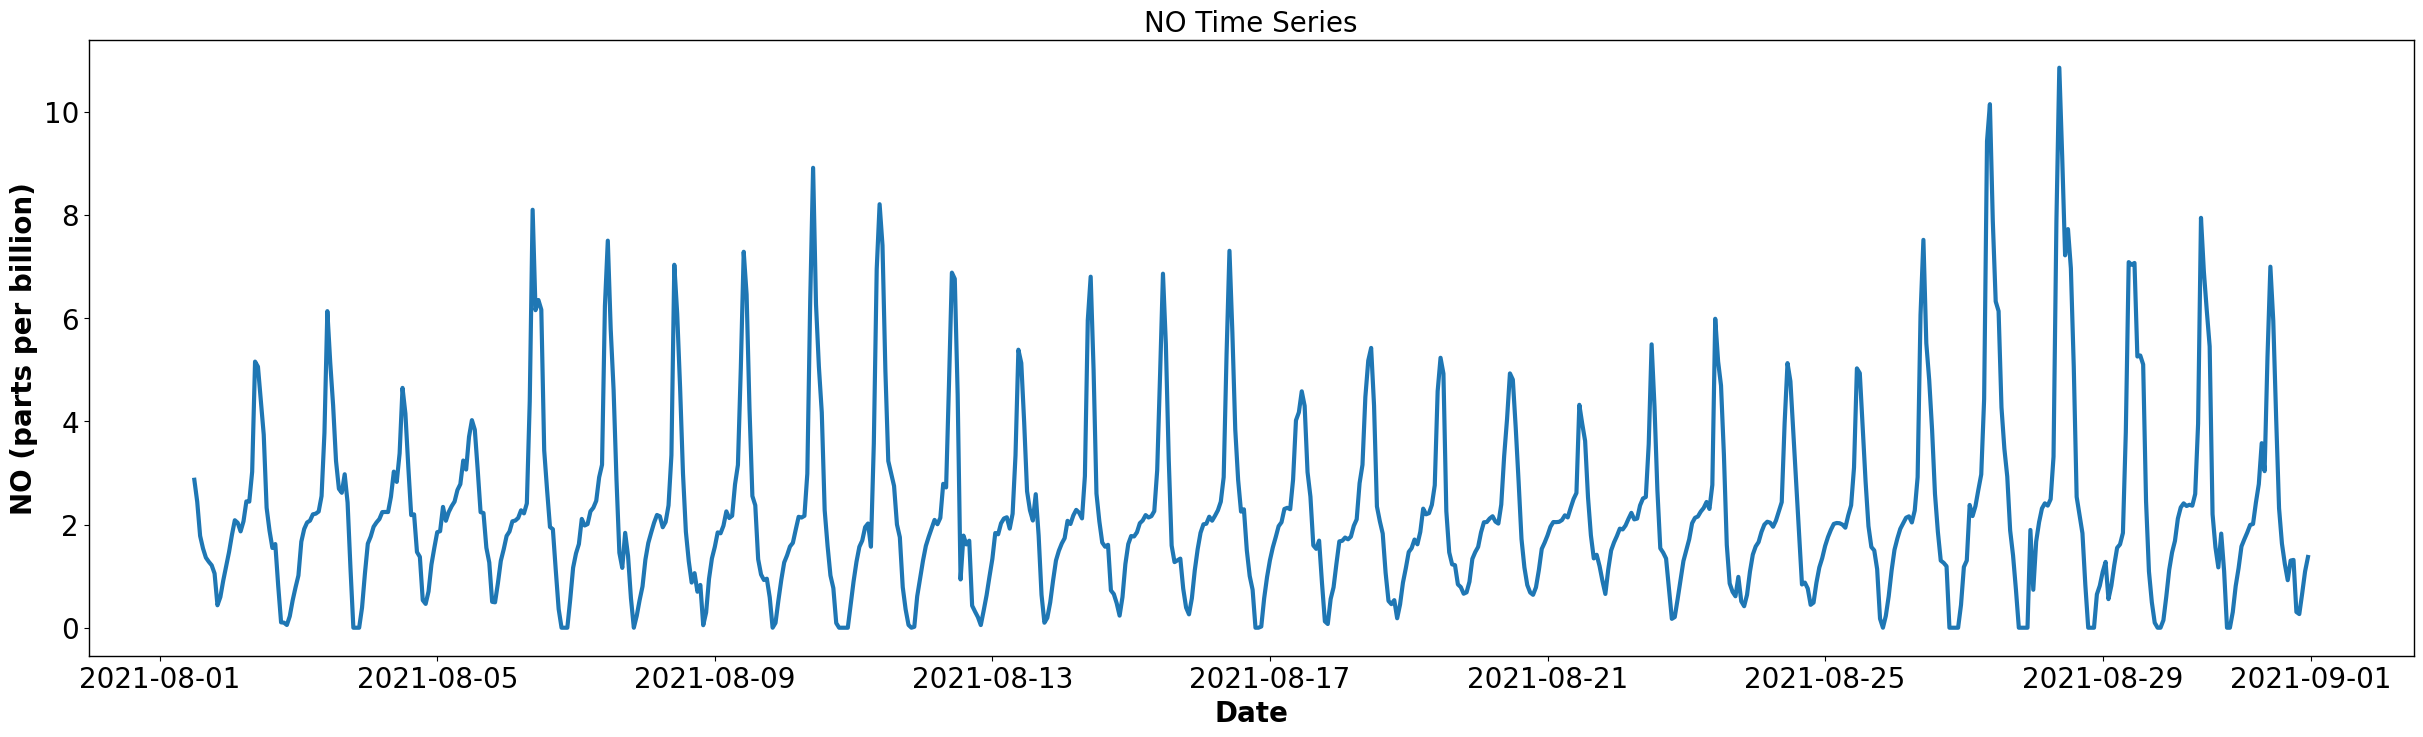

In [ ]:
## FOR NO POLLUTANT

plt.figure(figsize = (30, 8)) # given

plt.plot(data_no.index, data_no['no'])


# Adds a x-axis label: "Date"
plt.xlabel("Date")

# Adds a y-axis label: (Your pollutant and the units)
plt.ylabel("NO (parts per billion)")

# Adds a title to our line plot: "<Your Pollutant> Time Series"
plt.title("NO Time Series")


Text(0.5, 1.0, 'CO2 Time Series')

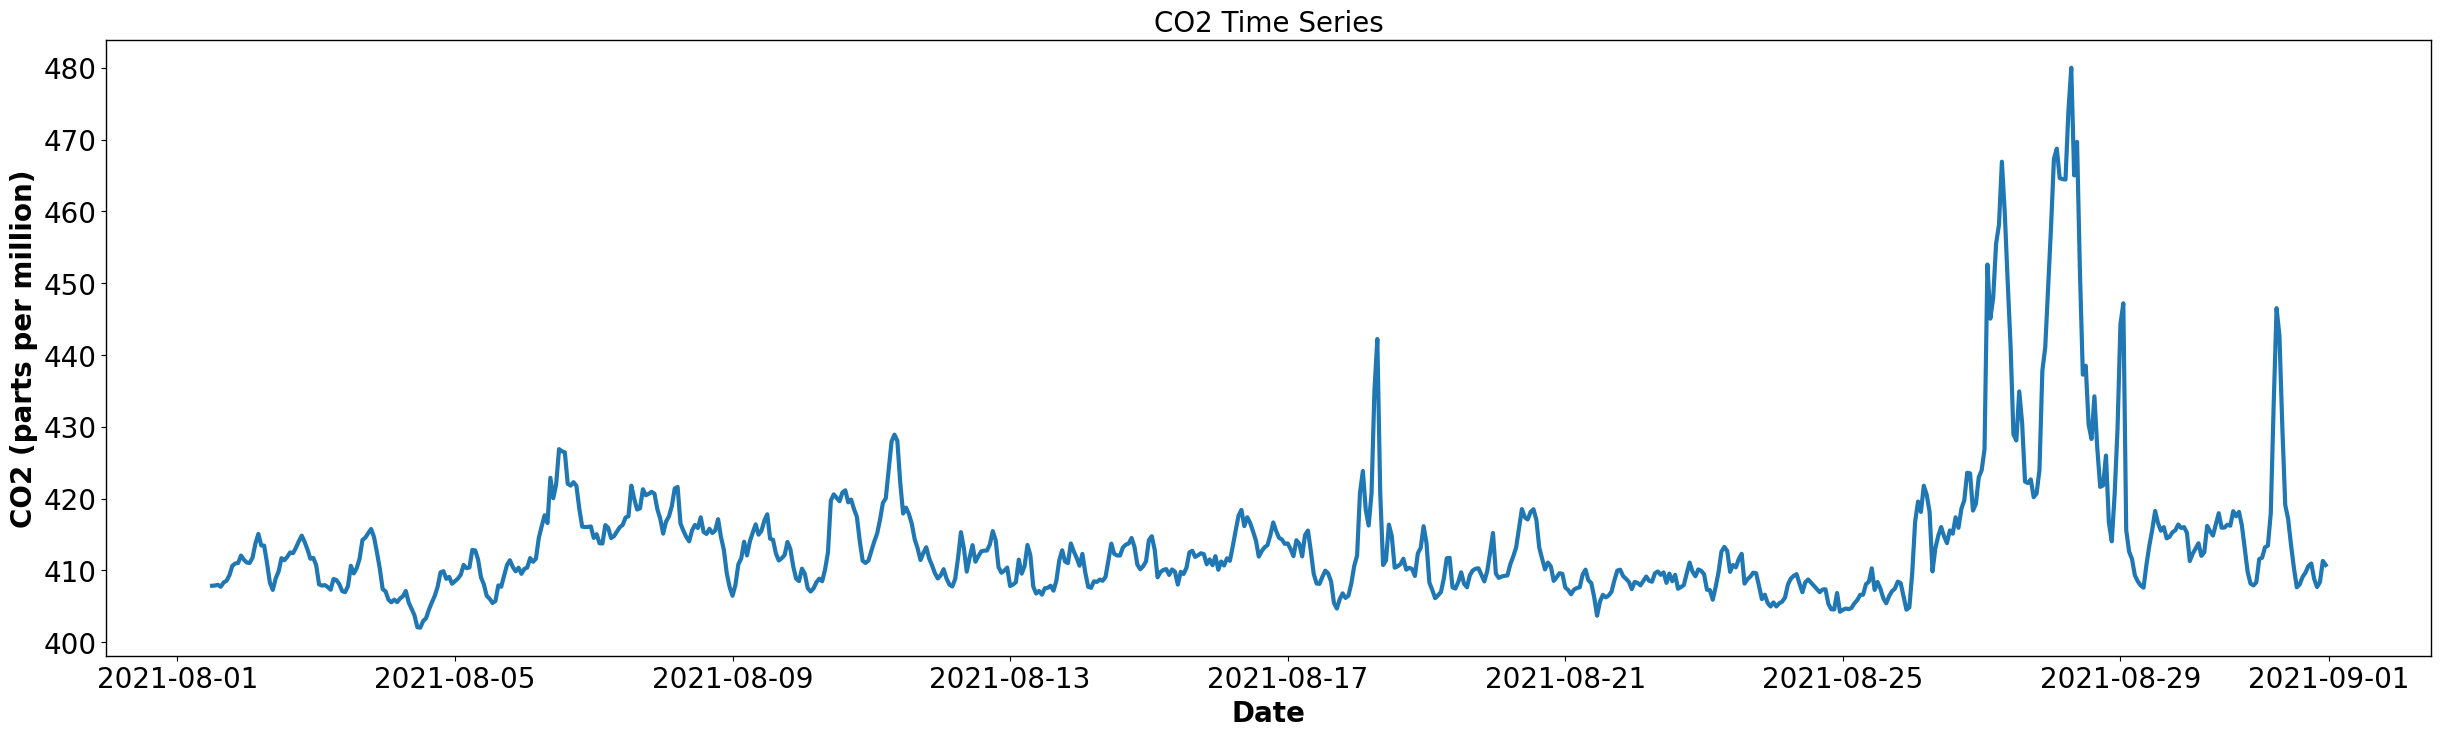

In [ ]:
## FOR CO2 POLLUTANT

plt.figure(figsize = (30, 8)) # given

plt.plot(data_co2.index, data_co2['co2'])


# Adds a x-axis label: "Date"
plt.xlabel("Date")

# Adds a y-axis label: (Your pollutant and the units)
plt.ylabel("CO2 (parts per million)")

# Adds a title to our line plot: "<Your Pollutant> Time Series"
plt.title("CO2 Time Series")


**Q3: Talk to a member from another pollutant group and compare plots. What differences do you see?**<br>Be sure to indicate which two pollutants you're comparing.






**STUDENT ANSWER HERE**
<br>**@ TEACHER:** Student answers will vary. Their observations should align with what is evident in the plots above. (Students will only have made one plot for one pollutant and will compare with someone who has a different pollutant plot.) Answers could mention:
* We see a bigger difference in the PM concentrations than the CO concentrations.
* CO2 concentrations have a baseline above zero when there *aren't* wildfires, but PM stays around 0.
* NO concentrations spike more often than CO2 and PM.

**Q4: What did you learn about how wildfires affect concentrations of these pollutants? What do you see in the plots that show you this?**

**STUDENT ANSWER HERE**
<br>**@ TEACHER:** Student answers will vary. The main takeway should be that all pollutants *increase* during the wildfire period. They should note that this is seen through increased y-values (measuring pollutant concentrations) around the x-values that represent the wildfire period.

***
##4. Conclusion
In this notebook, you learned about:
- Wildfire Pollutants
- Importing data
- Manipulating DataFrames
- Visualizing Data
  - Creating lineplots from DataFrames
  - Labelling lineplots
  - Understanding lineplots and what they represent


#### You've finished the Wildfire Combustion **Student Exploration** notebook. Good job! Congratulations on finishing the Wildfire Combustion lesson!

***
***